# Análise de Dados de Crédito
Para a análise, iniciaremos com uma Descritiva das variáveis de interesse presentes no Dataset. Após isso, elaboraremos modelos de previsão de bons e maus pagadores, a fim de compará-los e estudar a acurácia de cada um deles na amostra disponível. Os dados estão disponíveis no Kaggle (<a href="https://www.kaggle.com/rikdifos/credit-card-approval-prediction">acesse aqui</a>).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Verifica se o Scikit-Learn está presente no ambiente
import importlib.util
is_present = importlib.util.find_spec('sklearn')
if is_present is None:
    import pip
    pip.main(['install', 'scikit-learn'])
is_present = importlib.util.find_spec('statsmodels')
if is_present is None:
    import pip
    pip.main(['install', 'statsmodels'])

In [2]:
app_record = pd.read_csv('Data/application_record.csv')
app_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
cred_record = pd.read_csv('Data/credit_record.csv')
cred_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [4]:
# Categorização e Merge dos Dados: dados do Dataframe APP_RECORD não possuem a categoria de serem bons ou maus pagadores.
def categorize(row):
    if row['STATUS'] == 'C' or row['STATUS'] == 'X':
        return False
    else:
        return True

df_cred = pd.merge(app_record, cred_record, on="ID")
df_cred['BAD_PAYER'] = df_cred.apply(lambda row: categorize(row), axis=1)
df_cred.drop('MONTHS_BALANCE', axis=1, inplace=True)
df_cred_ = df_cred.groupby(df_cred['ID']).aggregate('first')

In [5]:
print(df_cred_.shape)
print(df_cred_['BAD_PAYER'].value_counts())
df_cred_.head(10)

(36457, 19)
False    27619
True      8838
Name: BAD_PAYER, dtype: int64


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,BAD_PAYER
ID,,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0,C,False
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0,C,False
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,C,False
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,True
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,X,False
5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,C,False
5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,C,False
5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,None,1.0,0,True
5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,None,1.0,0,True


In [6]:
def est_age(row):
    age = -1 * ( row['DAYS_BIRTH'] / 365 )
    return age
def est_empl(row):
    empl = -1 * ( row['DAYS_EMPLOYED'] / 365 )
    return empl
df_cred_['EST_AGE'] = df_cred_.apply(lambda row: est_age(row), axis = 1)
df_cred_['EST_EMPLOYMENT'] = df_cred_.apply(lambda row: est_empl(row), axis = 1)
df_cred_.loc[df_cred_['EST_EMPLOYMENT']<0, 'EST_EMPLOYMENT'] = 0
df_cred_.drop_duplicates(inplace=True)
df_cred_ = df_cred_.drop_duplicates(
  subset = ['EST_AGE', 'EST_EMPLOYMENT'],
  keep = 'first').reset_index(drop = True)
df_cred_.shape

(9429, 21)

/tmp/ipykernel_98503/3656447940.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_cred_['EST_AGE'], palette="tab1", kde=True, stat='probability', bins=int((max(df_cred_['EST_AGE']) - min(df_cred_['EST_AGE']))))
/tmp/ipykernel_98503/3656447940.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_cred_['EST_EMPLOYMENT'], palette="tab1", kde=True, stat='probability', bins=int((max(df_cred_['EST_EMPLOYMENT']) - min(df_cred_['EST_EMPLOYMENT']))))


Text(0, 0.5, 'Probability of Occurrence')

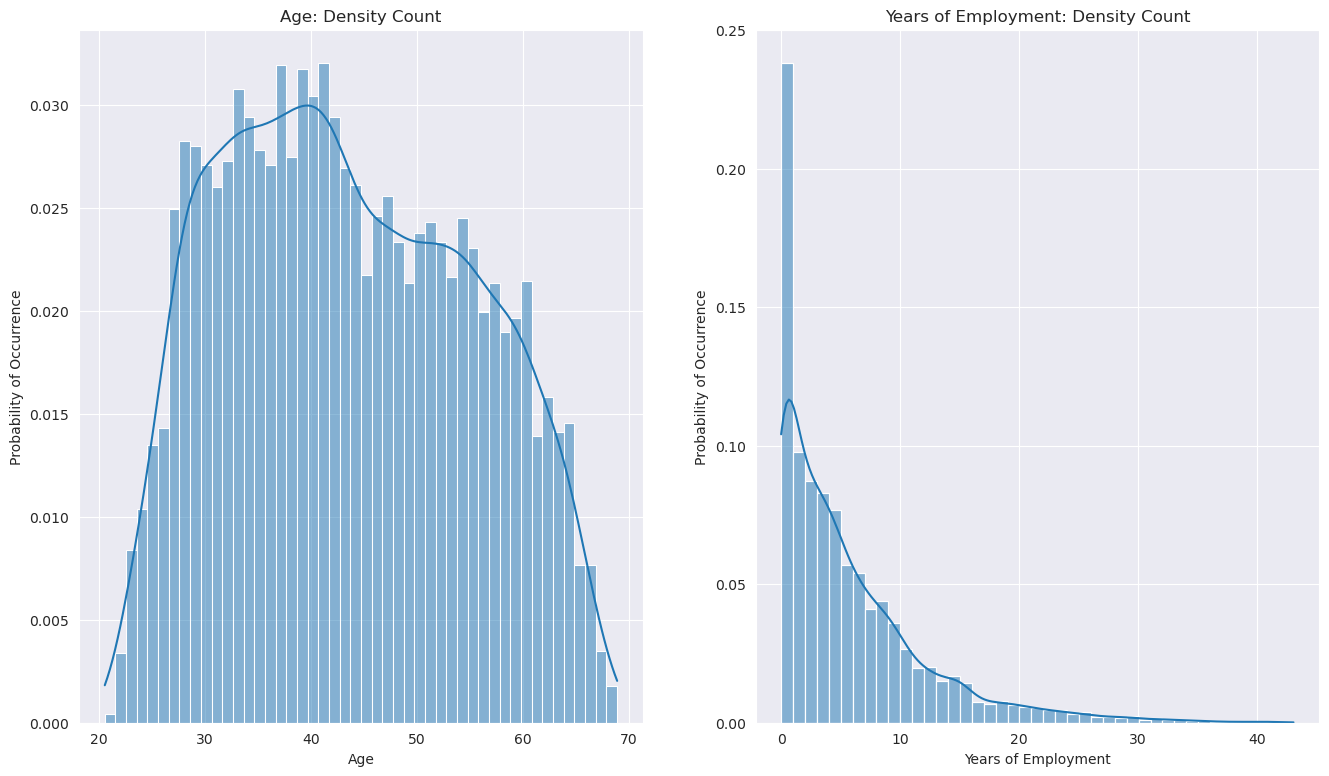

In [7]:
plt.figure(figsize=(16, 9))
plt.subplot(1,2,1)
sns.set_style("darkgrid")
sns.histplot(data=df_cred_['EST_AGE'], palette="tab1", kde=True, stat='probability', bins=int((max(df_cred_['EST_AGE']) - min(df_cred_['EST_AGE']))))
plt.title('Age: Density Count')
plt.xlabel('Age')
plt.ylabel('Probability of Occurrence')
plt.subplot(1,2,2)
sns.set_style("darkgrid")
sns.histplot(data=df_cred_['EST_EMPLOYMENT'], palette="tab1", kde=True, stat='probability', bins=int((max(df_cred_['EST_EMPLOYMENT']) - min(df_cred_['EST_EMPLOYMENT']))))
plt.title('Years of Employment: Density Count')
plt.xlabel('Years of Employment')
plt.ylabel('Probability of Occurrence')

In [8]:
import scipy.stats as stats
import numpy as np
cramer_v = {}
for item in df_cred_:
    if item == 'BAD_PAYER':
        continue
    # Testar Relação entre número de filhos e variável resposta
    dataset = df_cred_[[item, 'BAD_PAYER']]
    matrix = pd.crosstab(dataset['BAD_PAYER'], dataset[item], margins=True)
    matrix.drop('All', inplace=True)
    matrix.drop('All', inplace=True, axis=1)
    chisq = stats.chi2_contingency(matrix, correction=False)[0]
    n = matrix.sum()
    n = n.sum()
    mindim = min(dataset.shape) - 1
    cv = np.sqrt((chisq / n) / mindim)
    cramer_v[item] = cv

In [9]:
chaves = list(cramer_v.keys())
valores = list(cramer_v.values())
cramer_df = pd.DataFrame(valores, index=chaves)
cramer_df.sort_values(by=0, inplace=True)
cramer_df

,0
FLAG_MOBIL,0.000000
FLAG_OWN_CAR,0.001262
CODE_GENDER,0.010443
FLAG_PHONE,0.013065
NAME_EDUCATION_TYPE,0.013436
NAME_HOUSING_TYPE,0.013744
FLAG_WORK_PHONE,0.015728
NAME_FAMILY_STATUS,0.017249
FLAG_EMAIL,0.017930
FLAG_OWN_REALTY,0.020222


In [10]:
df_model = df_cred_[['EST_AGE', 'EST_EMPLOYMENT', 'AMT_INCOME_TOTAL', 'BAD_PAYER']]
df_model.head()

,EST_AGE,EST_EMPLOYMENT,AMT_INCOME_TOTAL,BAD_PAYER
0,32.890411,12.443836,427500.0,False
1,58.832877,3.106849,112500.0,False
2,52.356164,8.358904,270000.0,True
3,61.545205,0.000000,283500.0,True
4,46.224658,2.106849,270000.0,True


In [11]:
from sklearn.model_selection import train_test_split

x = df_model.drop("BAD_PAYER", axis=1)
y = df_model["BAD_PAYER"]

xtrain, xtest, ytrain, ytest = train_test_split(x, y)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(metric='manhattan')
hyperparams = {'n_neighbors': np.arange(1,25)}
knn_gscv = GridSearchCV(knn, hyperparams, cv=5)
knn_gscv.fit(xtrain, ytrain)
n_neighbors = knn_gscv.best_params_
print(f'O número ótimo de vizinhos encontrado pelo algoritmo é de {n_neighbors["n_neighbors"]}')

O número ótimo de vizinhos encontrado pelo algoritmo é de 24


In [15]:
from sklearn.metrics import accuracy_score

y_predict = knn_gscv.predict(xtest)
test_acc = accuracy_score(ytest, y_predict)
print(f'A acurácia do modelo é de {test_acc*100:.4f}%')

A acurácia do modelo é de 76.5903%


In [16]:
x_model = df_model.drop('BAD_PAYER', axis=1)
y_model = df_model['BAD_PAYER']
pred_model = knn_gscv.predict_proba(x_model)
print(pred_model)

[[0.75       0.25      ]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 ...
 [0.66666667 0.33333333]
 [0.70833333 0.29166667]
 [0.875      0.125     ]]


In [17]:
prob_bad_payer_false = [x[0] for x in pred_model]
df_cred_['KNN_PROB_ESTIMATE_FALSE'] = prob_bad_payer_false

In [18]:
df_cred_.head(4)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,BAD_PAYER,EST_AGE,EST_EMPLOYMENT,KNN_PROB_ESTIMATE_FALSE
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,1,0,0,None,2.0,C,False,32.890411,12.443836,0.750000
1,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,...,0,0,0,Security staff,2.0,C,False,58.832877,3.106849,0.666667
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,0,1,1,Sales staff,1.0,0,True,52.356164,8.358904,0.666667
3,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,...,0,0,0,None,1.0,0,True,61.545205,0.000000,0.541667


In [19]:
df_model = df_cred_.drop(['CODE_GENDER', 'STATUS'], axis=1)
metadata = pd.DataFrame(df_model.dtypes, columns = ['TYPE'])
metadata['N_CAT'] = 0
for var in metadata.index:
    metadata.loc[var,'N_CAT'] = len(df_model.groupby([var]).size())
metadata

,TYPE,N_CAT
FLAG_OWN_CAR,object,2
FLAG_OWN_REALTY,object,2
CNT_CHILDREN,int64,9
AMT_INCOME_TOTAL,float64,259
NAME_INCOME_TYPE,object,5
NAME_EDUCATION_TYPE,object,5
NAME_FAMILY_STATUS,object,5
NAME_HOUSING_TYPE,object,6
DAYS_BIRTH,int64,7183
DAYS_EMPLOYED,int64,3640


In [20]:
obj_var = [var for var in metadata.index if metadata['TYPE'][var] == 'object']
print(f'Lista de variáveis categóricas: {obj_var}')

df_model = pd.get_dummies(df_model, columns=[x for x in obj_var], drop_first=True)
df_model

Lista de variáveis categóricas: ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']


,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,BAD_PAYER,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,0,427500.0,-12005,-4542,1,1,0,0,2.0,False,...,0,0,0,0,0,0,0,0,0,0
1,0,112500.0,-21474,-1134,1,0,0,0,2.0,False,...,0,0,0,0,0,0,0,0,1,0
2,0,270000.0,-19110,-3051,1,0,1,1,1.0,True,...,0,0,0,0,0,0,1,0,0,0
3,0,283500.0,-22464,365243,1,0,0,0,1.0,True,...,0,0,0,0,0,0,0,0,0,0
4,0,270000.0,-16872,-769,1,1,1,1,2.0,True,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,0,112500.0,-9874,-1650,1,1,0,0,1.0,False,...,0,0,0,1,0,0,0,0,0,0
9425,1,135000.0,-16302,-8894,1,0,0,0,3.0,True,...,0,0,0,1,0,0,0,0,0,0
9426,1,112500.0,-14234,-309,1,0,0,0,3.0,False,...,0,0,0,0,0,0,0,0,0,0
9427,0,180000.0,-17713,-2441,1,0,0,0,2.0,False,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Heatmap: Correlações entre variáveis de análise de crédito')

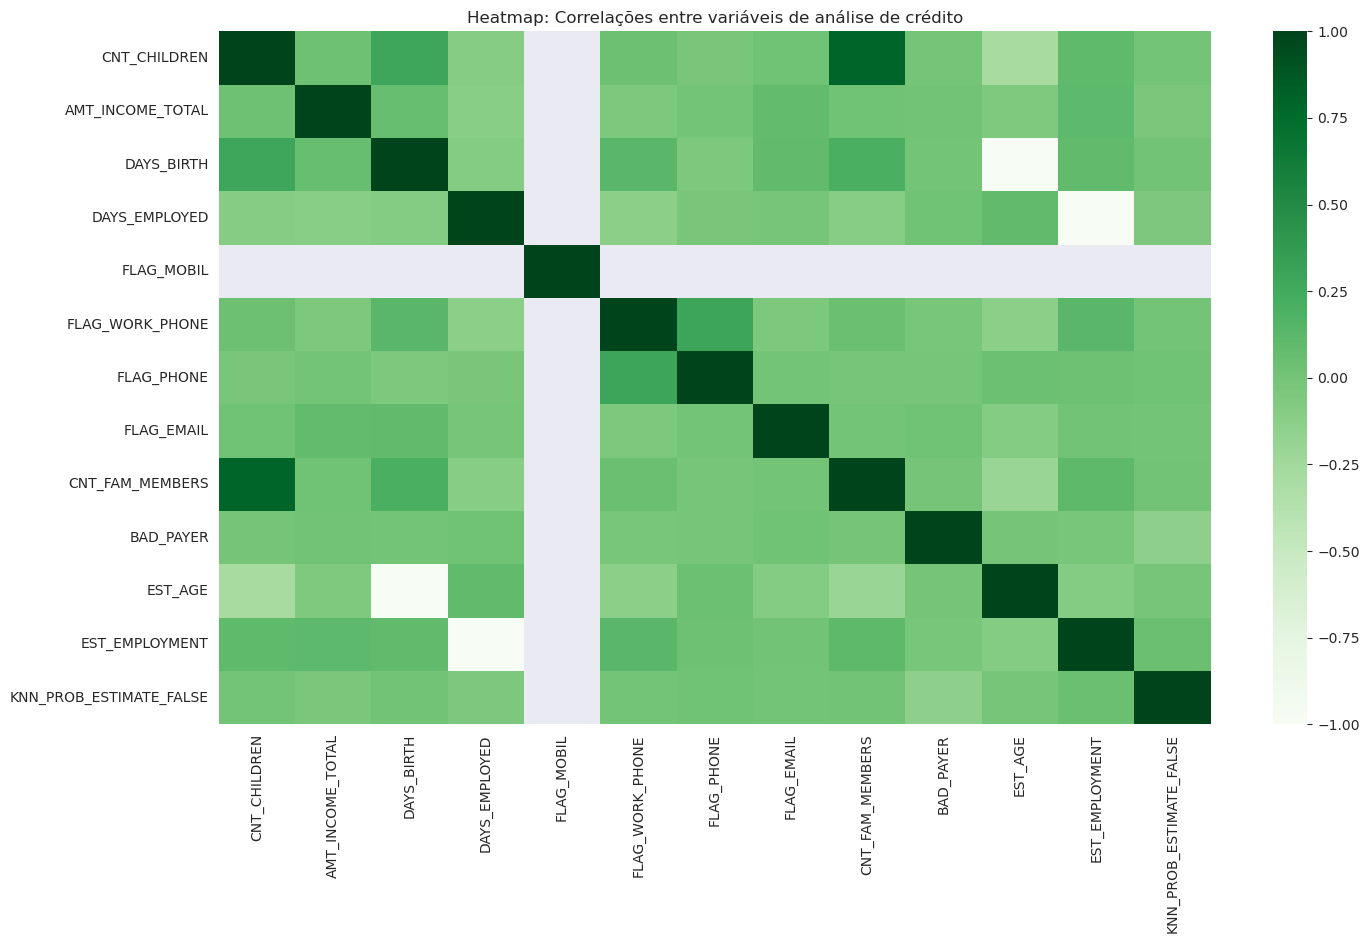

In [42]:
plt.figure(figsize=(16,9))
sns.heatmap(df_cred_.corr(method='kendall'),
            fmt='.2f',
            cmap='Greens')
plt.title("Heatmap: Correlações entre variáveis de análise de crédito")

In [44]:
from sklearn.ensemble import RandomForestClassifier

x = df_model.drop("BAD_PAYER",axis = 1)
y = df_model["BAD_PAYER"]

x_train, x_test, y_train, y_test = train_test_split(x, y)

model = RandomForestClassifier(n_estimators=1000)

model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [45]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 76.04%
